# Analyze Phytoplankton abundances of time series data
(from BCO Phytoplankton file)

In [1]:
require(dplyr, warn.conflicts = FALSE)
require(cowplot, warn.conflicts = FALSE)

Loading required package: dplyr
Loading required package: cowplot
Loading required package: ggplot2


In [2]:
# read csv file
phyto <- read.csv("DATA_processed/Phytoplankton.csv")

# read Date column as POSIXct
phyto$date <- as.POSIXct(phyto$date, format="%Y-%m-%d")

# clean up data

In [3]:
# remove ChlMax value from $depth
dp1_0 <- phyto[!phyto$depth == "ChlMax",]
dp1_0$depth <- as.numeric(as.character(dp1_0$depth))
# remove clear outliers (10 abundance values at 9.96921e+36)
dp1_1 <- dp1_0[!dp1_0$abundance > 1e5,]

# remove non-sensical data, that might interfere with sums of Groups
dp1_2 <- dp1_1[!dp1_1$taxon=='SUBTOTAL',]
dp1_3 <- dp1_2[!dp1_2$taxon=='COCCOLITHOPHORIDS_SUBTOTAL',]
dp1_4 <- dp1_3[!dp1_3$taxon=='0',]
dp1_5 <- dp1_4[!dp1_4$taxon=='Number_of_species',]
dp1_6 <- dp1_5[!dp1_5$taxon=='NUMBER_OF_OTHERS',]
dp1_7 <- dp1_6[!dp1_6$taxon=='Others_abundance',]
dp1_8 <- dp1_7[!is.na(dp1_7$abundance),]

dp_filtered <- dp1_8

In [5]:
# save to file for plotting in other notebooks:
# Write CSV in R
write.csv(dp_filtered, file = "DATA_processed/PhytoAbund_filtered.csv")

date,group,Abundance
1995-11-08,COCCOLITHOPHORIDS,8.753
1995-11-08,CYANOBACTERIA,12.883
1995-11-08,DIATOMS,403.731
1995-11-08,DINOFLAGELLATES,76.326
1995-11-08,NANOFLAGELLATES,1616.710
1995-11-08,OTHERS,0.431


Warning message:
“Transformation introduced infinite values in continuous y-axis”

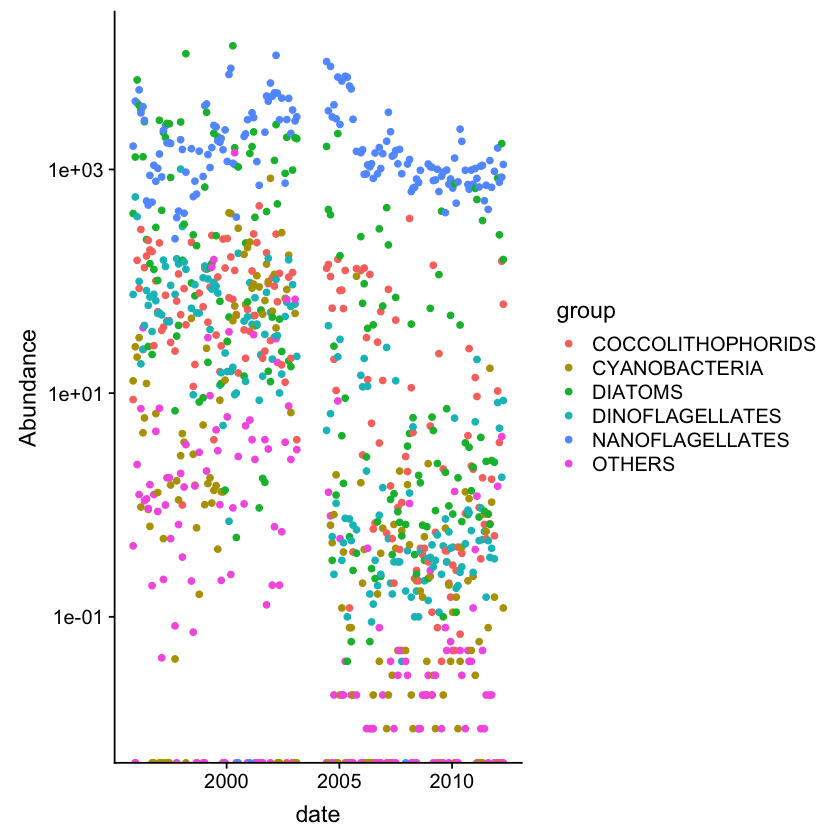

In [4]:
#sum up abundances per taxons for each date
dp2 <- dp_filtered %>% 
  group_by(date, group, taxon) %>% 
  summarise(Abundance = sum(abundance)) 

# sum up total abundances per group per date
dpGroupPerTime <- dp_filtered %>% 
  group_by(date, group) %>% 
  summarise(Abundance = sum(abundance)) 

dpGroupPerDepthPerTime <- dp_filtered %>% 
  group_by(date,depth, group) %>% 
  summarise(Abundance = sum(abundance)) 

#plot all abundances per group per date
dpGroupPerTime_notot <- dpGroupPerTime[!dpGroupPerTime$group=='TOTAL',]

head(dpGroupPerTime)
ggplot(data=dpGroupPerTime_notot,aes(x=date,y=Abundance,col=group))+geom_point()+scale_y_log10()

date,depth,group,Abundance
1995-11-08,1,COCCOLITHOPHORIDS,0.000
1995-11-08,1,CYANOBACTERIA,0.000
1995-11-08,1,DIATOMS,59.000
1995-11-08,1,DINOFLAGELLATES,8.500
1995-11-08,1,NANOFLAGELLATES,113.168
1995-11-08,1,OTHERS,0.000


Warning message:
“Transformation introduced infinite values in continuous y-axis”

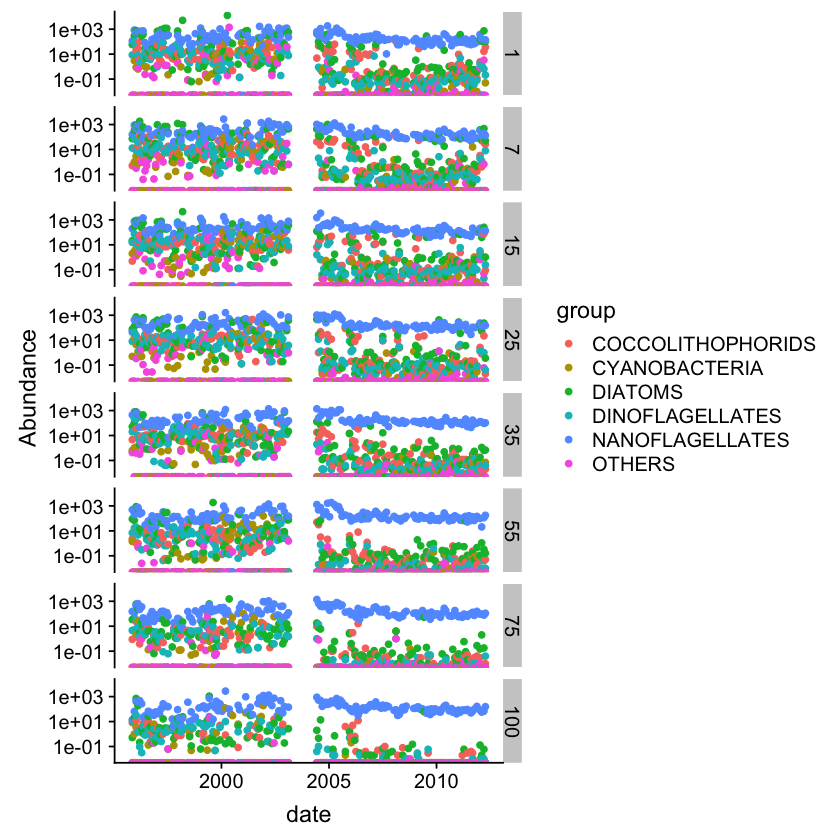

In [5]:
#plot all abundances per group per date split by depth
dpGroupPerDepthPerTime_notot <- dpGroupPerDepthPerTime[!dpGroupPerDepthPerTime$group=='TOTAL',]

head(dpGroupPerDepthPerTime_notot)
ggplot(data=dpGroupPerDepthPerTime_notot,aes(x=date,y=Abundance,col=group))+
  geom_point()+scale_y_log10() + facet_grid(depth ~ .)

# Split data into two regimes
according to Pinckney et al. 2015

In [8]:
#split data into two regimes:
dpR1 <- dpGroupPerDepthPerTime_notot[!dpGroupPerDepthPerTime_notot$date>as.POSIXct('2000-10-08'),]
dpR2 <- dpGroupPerDepthPerTime_notot[!dpGroupPerDepthPerTime_notot$date<as.POSIXct('2006-07-08'),]

# create day of year and month columsn for aggregate plotting
dpR1$dyear <- as.Date(format(dpR1$date, format="%m-%d"),format="%m-%d")
dpR2$dyear <- as.Date(format(dpR2$date, format="%m-%d"),format="%m-%d")
dpR1$month <- as.numeric(format(dpR1$date, format="%m"))
dpR2$month <- as.numeric(format(dpR2$date, format="%m"))

## plot regimes

Warning message:
“Transformation introduced infinite values in continuous y-axis”

Warning message:
“Transformation introduced infinite values in continuous y-axis”

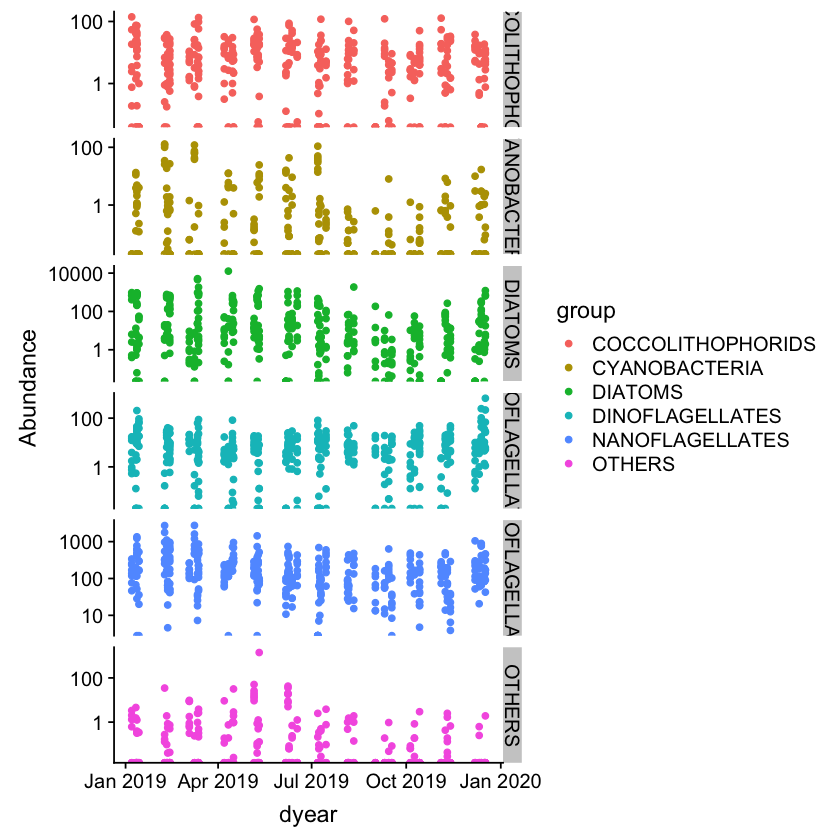

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 768 rows containing non-finite values (stat_boxplot).”

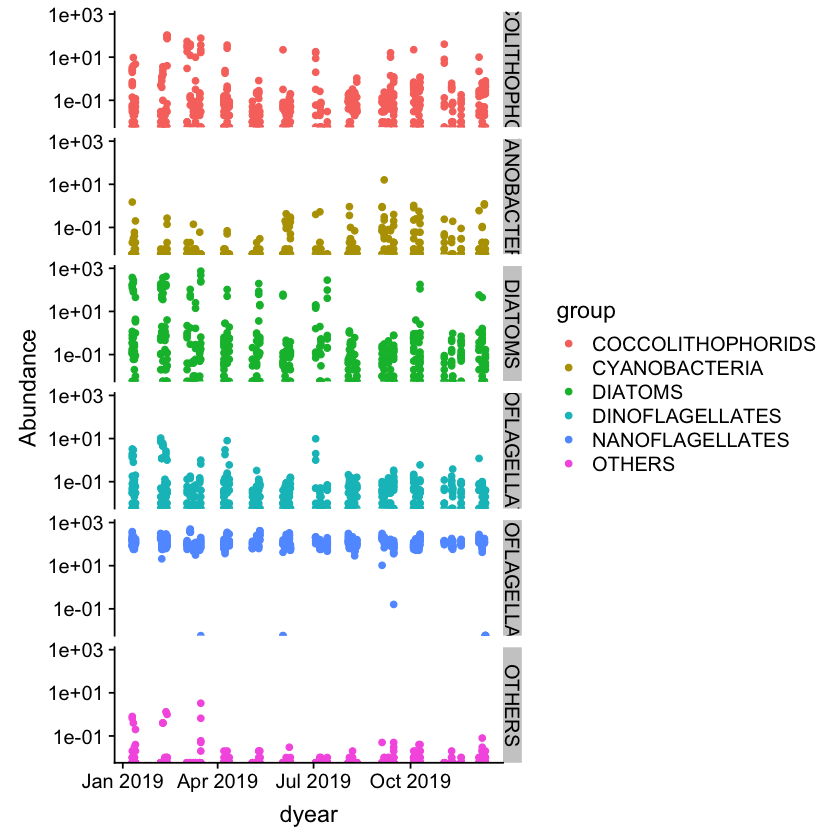

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 768 rows containing non-finite values (stat_boxplot).”

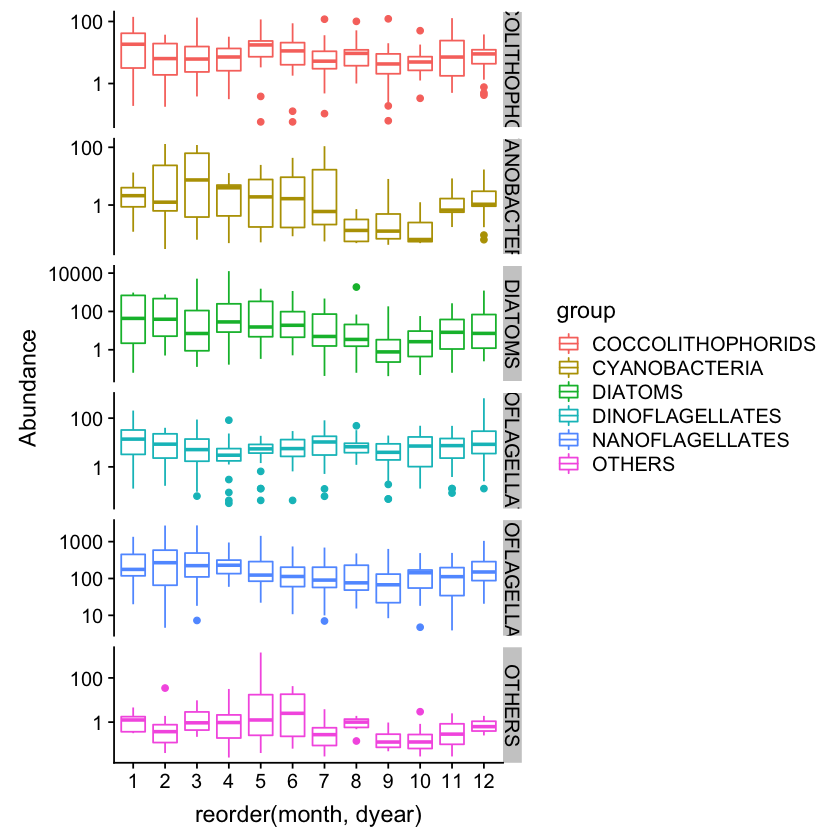

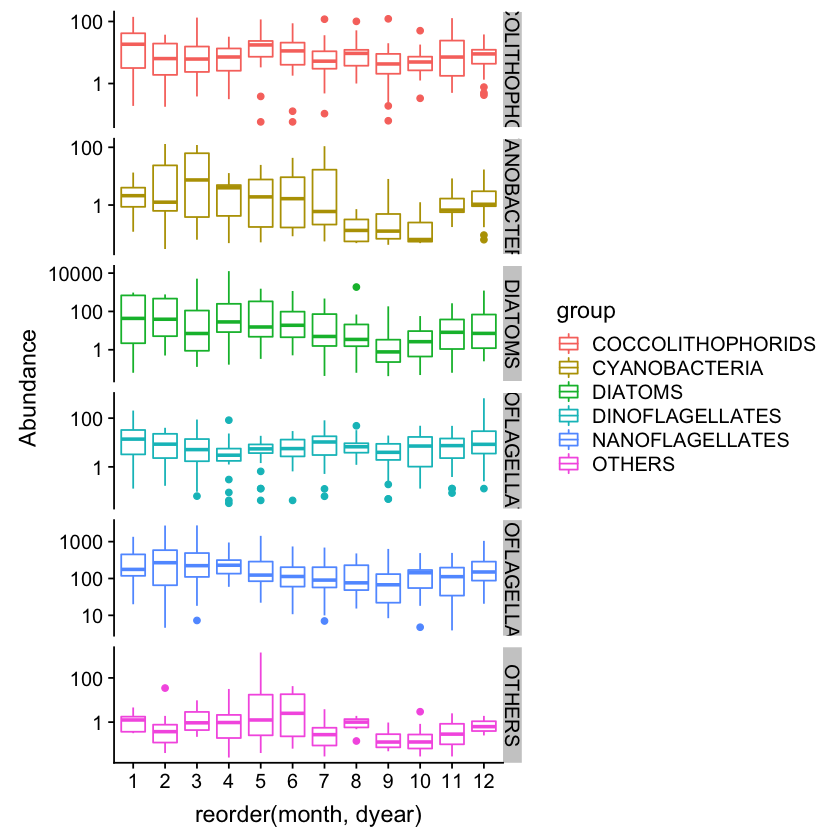

In [11]:
#plot aggregated yearly abundances per group (all depths)
ggplot(data=dpR1,aes(x=dyear,y=Abundance,col=group))+geom_point()+scale_y_log10() + 
  facet_grid(group ~ .,scales="free_y")
ggplot(data=dpR2,aes(x=dyear,y=Abundance,col=group))+geom_point()+scale_y_log10() + 
  facet_grid(group ~ .)#,scales="free_y")

# plot boxplot of distribution over the year per group
ggplot(dpR1) + geom_boxplot(aes(x=reorder(month,dyear), y=Abundance, col=group))+scale_y_log10() + 
  facet_grid(group ~ .,scales="free_y")

# plot median of abundance over the year per group
ggplot(dpR1) + geom_boxplot(aes(x=reorder(month,dyear), y=Abundance, col=group))+scale_y_log10() + 
  facet_grid(group ~ .,scales="free_y")

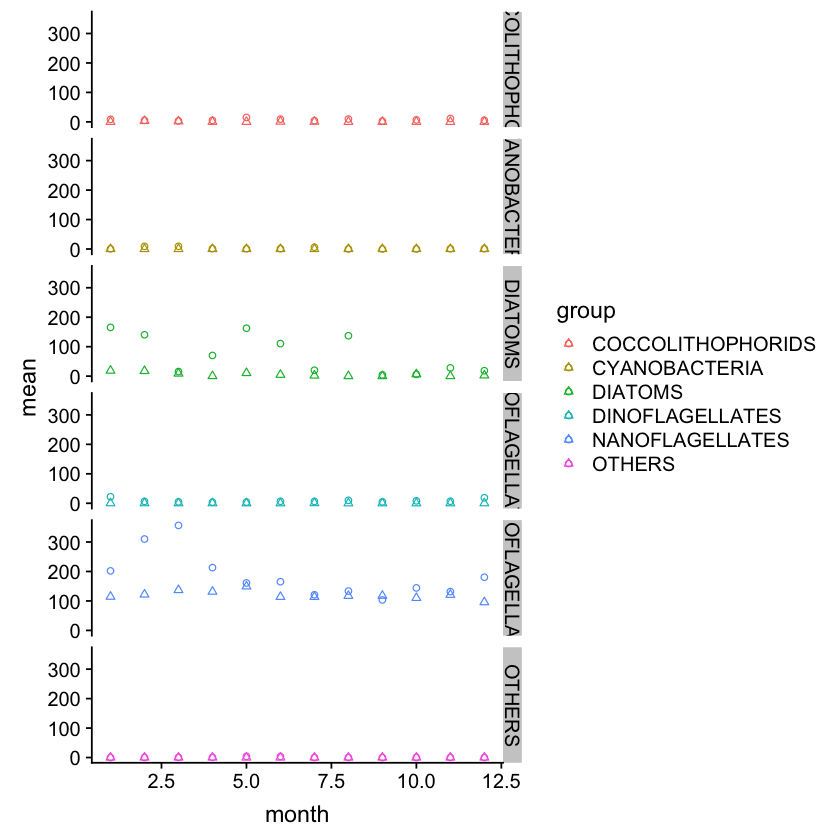

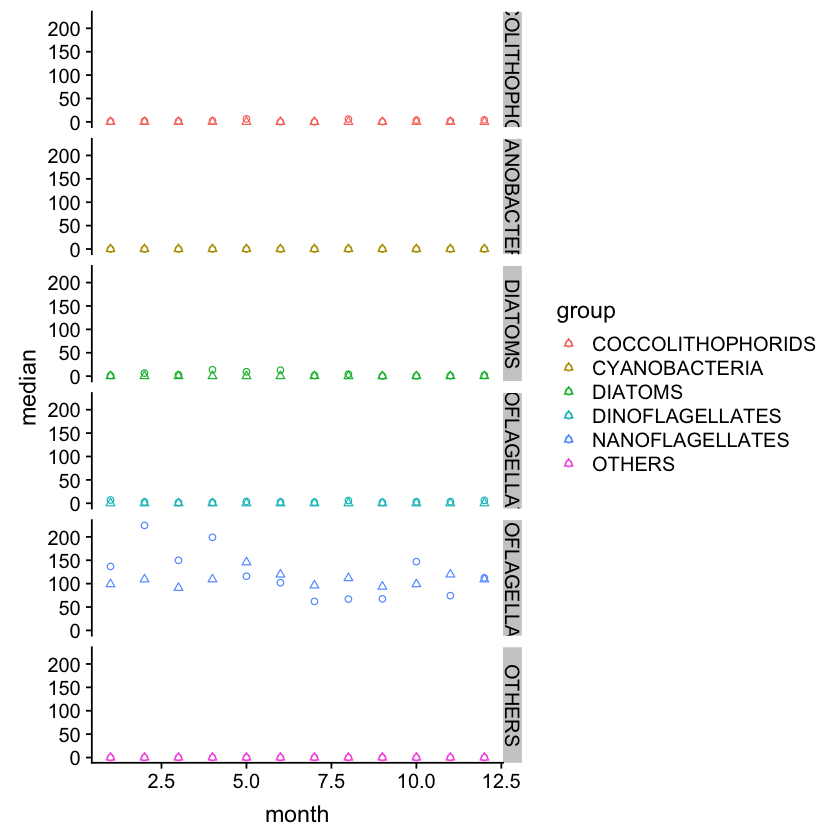

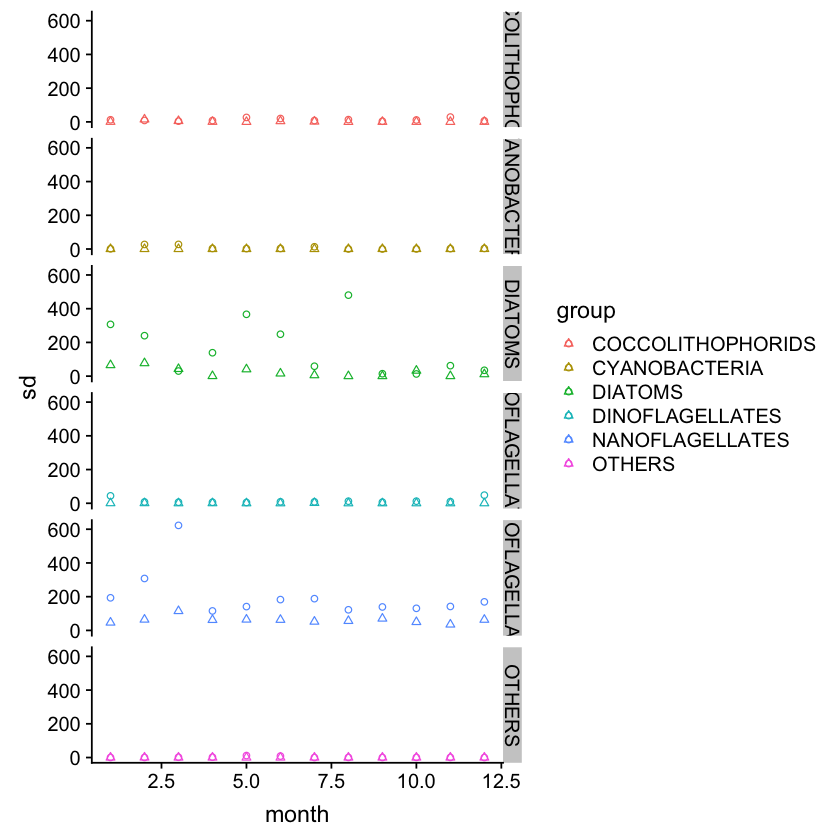

In [12]:
dpR1_monthly <- dpR1upper %>%
group_by(month,group) %>%
  summarise(median = median(Abundance),mean = mean(Abundance), sd = sd(Abundance))
dpR2_monthly <- dpR2upper %>%
  group_by(month,group) %>%
  summarise(median = median(Abundance),mean = mean(Abundance), sd = sd(Abundance))

ggplot(dpR1_monthly) + geom_point(aes(x=month, y=mean, col=group),shape=1)+#scale_y_log10() + 
  facet_grid(group ~ .,scales="free_y") + scale_y_continuous(limits=c(0,max(dpR1_monthly$mean))) + 
  geom_point(data = dpR2_monthly,aes(x=month, y=mean, col=group),shape=2)

ggplot(dpR1_monthly) + geom_point(aes(x=month, y=median, col=group),shape=1)+#scale_y_log10() + 
  facet_grid(group ~ .,scales="free_y") + scale_y_continuous(limits=c(0,max(dpR1_monthly$median))) + 
  geom_point(data = dpR2_monthly,aes(x=month, y=median, col=group),shape=2)

ggplot(dpR1_monthly) + geom_point(aes(x=month, y=sd, col=group),shape=1)+#scale_y_log10() + 
  facet_grid(group ~ .,scales="free_y") + scale_y_continuous(limits=c(0,max(dpR1_monthly$sd))) + 
  geom_point(data = dpR2_monthly,aes(x=month, y=sd, col=group),shape=2)

# same plot with coefficient of variability